**Prodigy Infotech**

**Machine Learning Internship Tasks**

**Task 1) "Mall Customer Segmentation" by ABU BAKAR SIDDIQ**

**This Performs "Customer Segmentation" on "Mall Customer Data" using Clustering Techniques. The Analysis includes Data Preprocessing, Dimensionality Reduction, Clustering & Various Visualizations to understand Customer Segments & their Characteristics.**

**Importing all Necessary Libraires**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Loading DataSet**

In [24]:
df = pd.read_csv('Mall_Customers.csv')

**Discovering DataSet**

In [25]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.shape

(200, 5)

In [27]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
print("\nStatistics:")
df.describe()


Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Encoding Gender column, selecting features for Clustering, Scaling features & using PCA to Reduce Dimensionality**

In [29]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Checking for Optimal no.of Clusters using the Elbow Method**

In [30]:
inertia = []
silhouette_scores = []
for n in range(2, 11):  
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

**Plotting the Elbow Method**

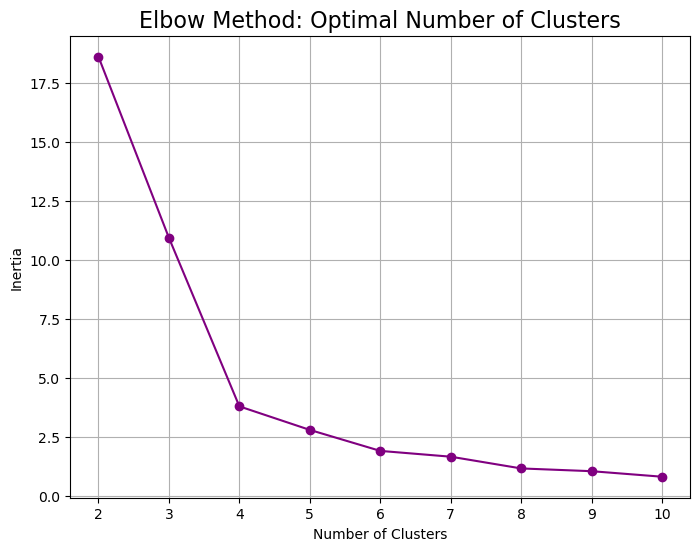

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', color='purple')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Plotting Silhouette Scores**

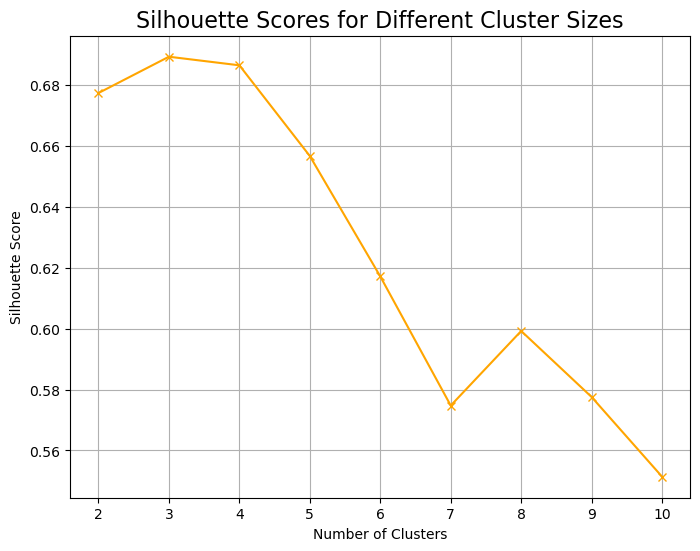

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='x', color='orange')
plt.title('Silhouette Scores for Different Cluster Sizes', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**Applying K-means Clustering with Optimal Clusters (Best based on Silhouette Score)**

In [33]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) +2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

sil_score = silhouette_score(X_pca, df['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.6893


**Plotting Distributions of Age, Income & Spending Score**

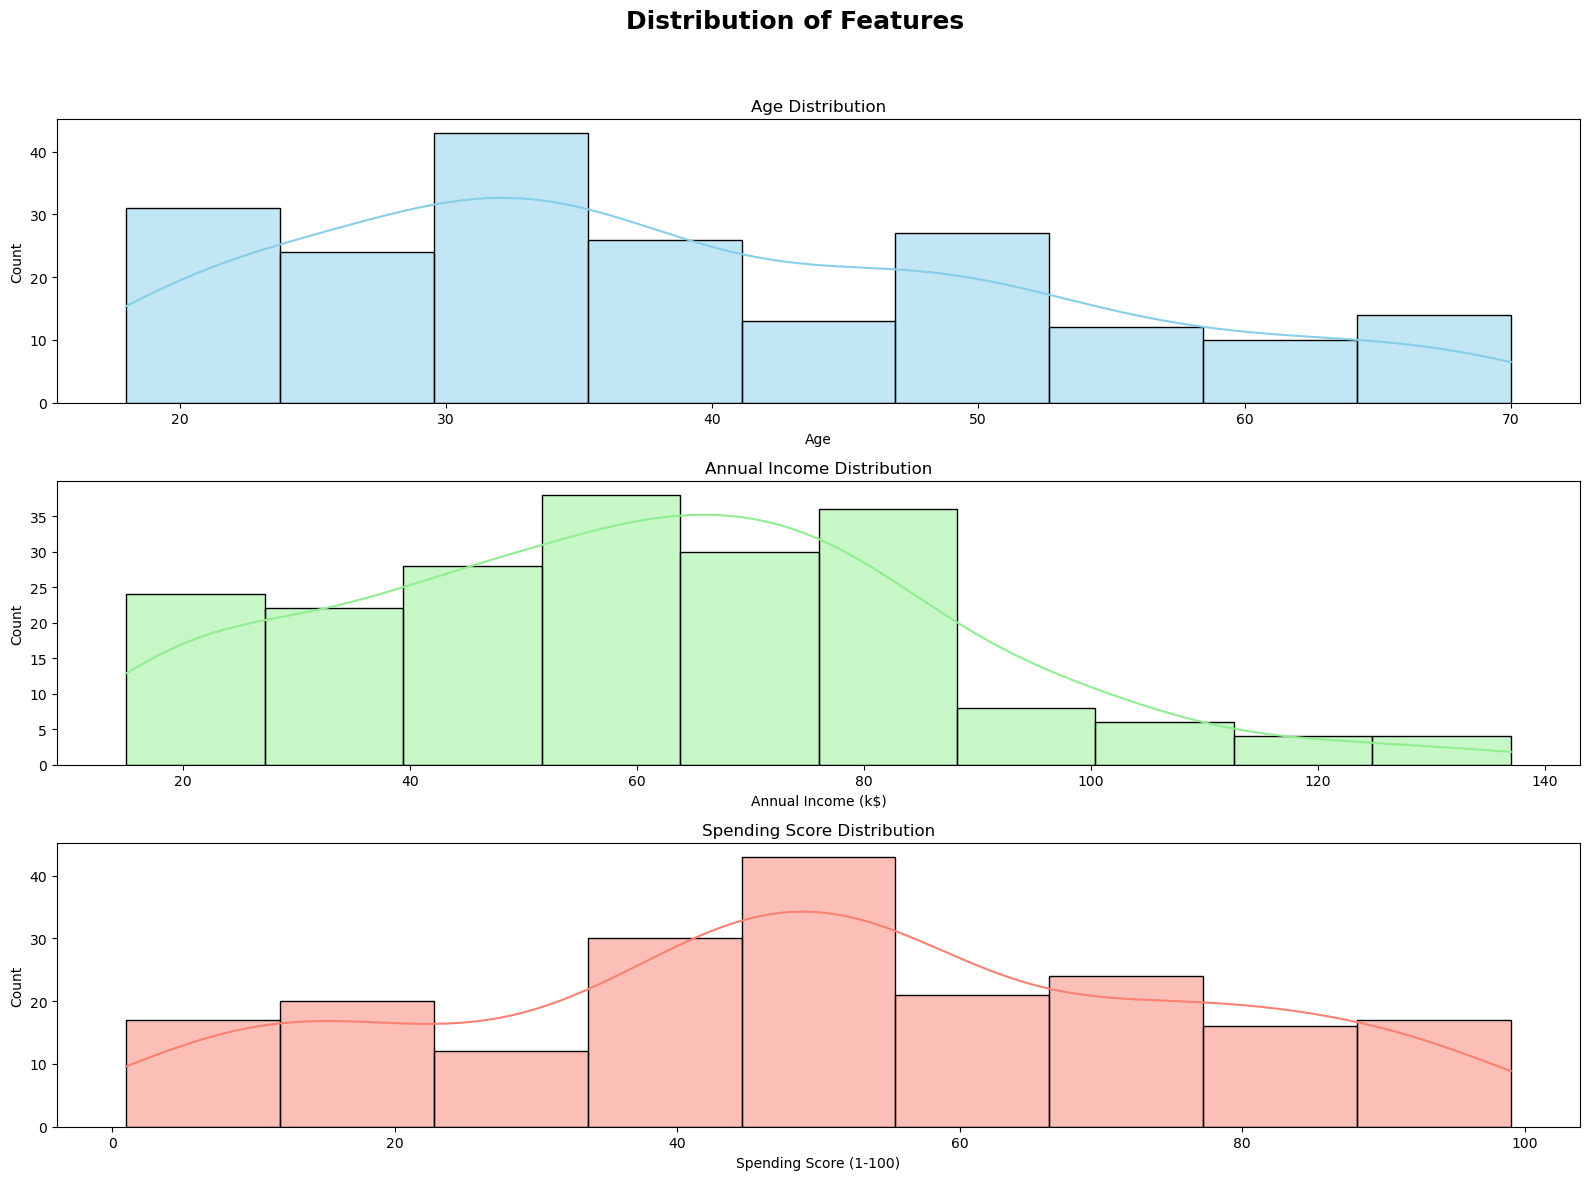

In [34]:
plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Features', fontsize=18, fontweight='bold')

plt.subplot(3, 1, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(3, 1, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='lightgreen')
plt.title('Annual Income Distribution')

plt.subplot(3, 1, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='salmon')
plt.title('Spending Score Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Visualizing Clusters: PCA Component 1 vs PCA Component 2**

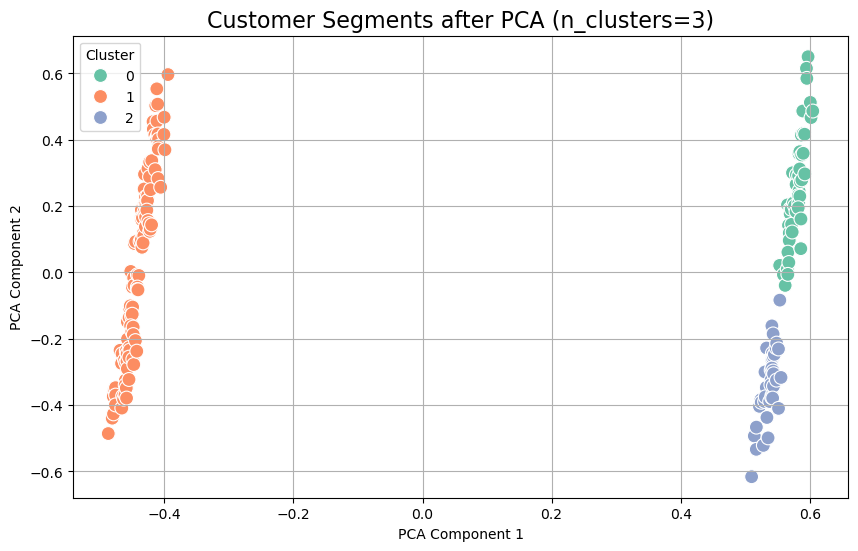

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title(f'Customer Segments after PCA (n_clusters={optimal_clusters})', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Visualizing Clusters: Annual Income vs Spending Score**

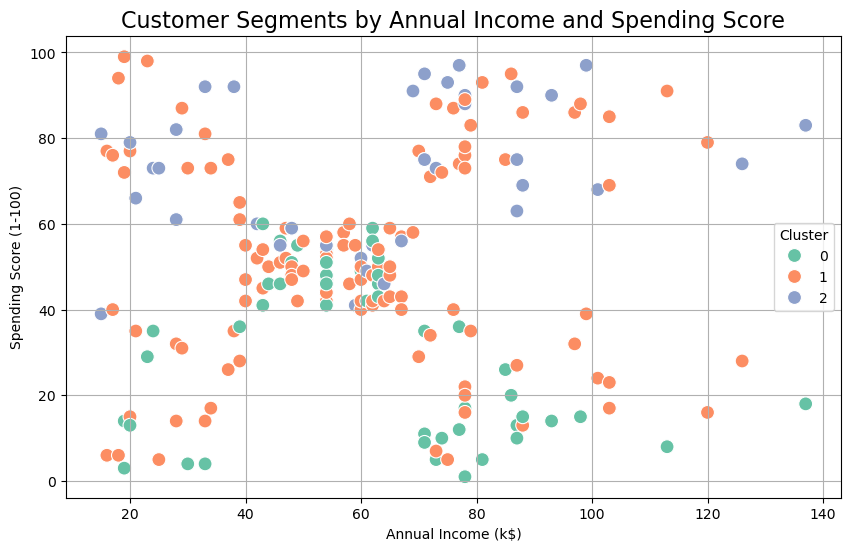

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments by Annual Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Visualizing Clusters: Age vs Spending Score**

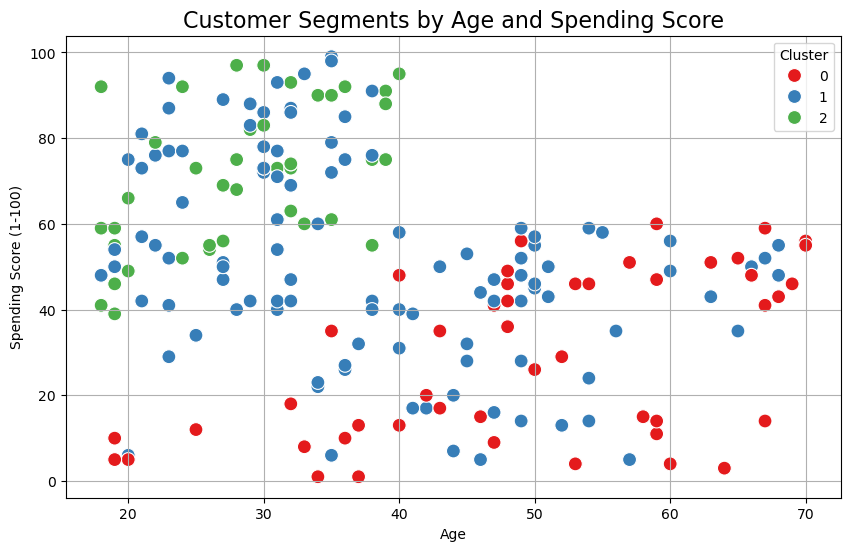

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Customer Segments by Age and Spending Score', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Visualizing Gender Distribution across Clusters**

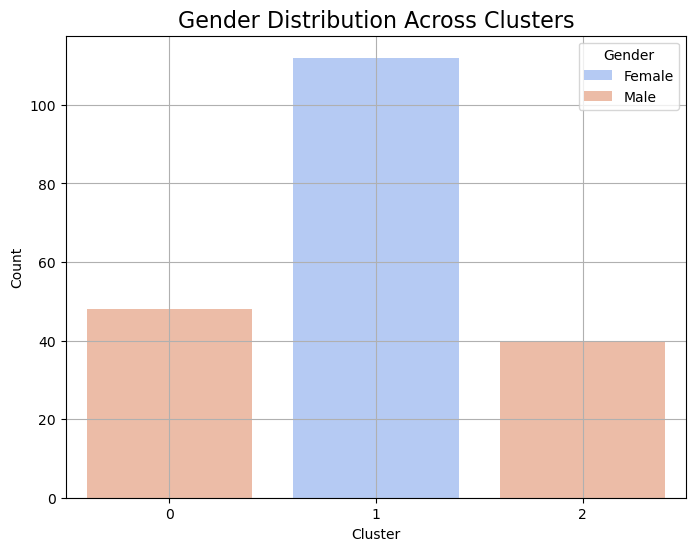

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution Across Clusters', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()

**Visualizing pairplot of Age, Annual Income, Spending Score colored by Clusters**

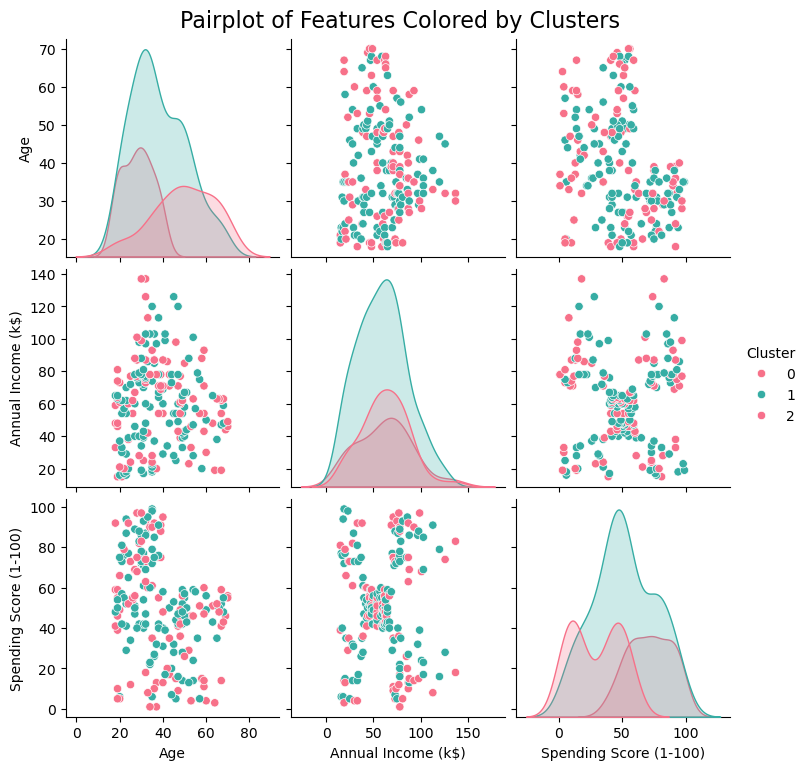

In [39]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='husl')
plt.suptitle('Pairplot of Features Colored by Clusters', y=1.02, fontsize=16)
plt.show()

**Visualizing no.of Customers Per Cluster**

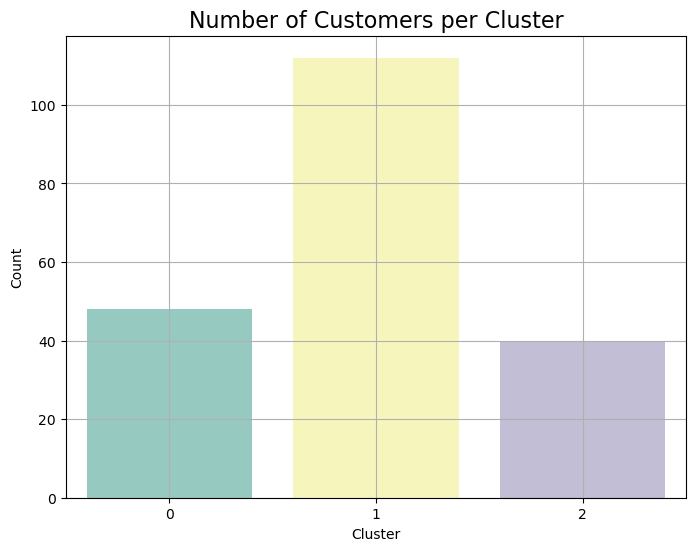

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='Set3')
plt.title('Number of Customers per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()